# Laboratorium 7

## Automaty komórkowe - modelowanie epidemii

Proszę zaimplementować model epidemii jako automat komórkowy https://mathworld.wolfram.com/CellularAutomaton.html 
Przykładowe modele to np. SIR lub SIS https://en.wikipedia.org/wiki/Epidemic_models_on_lattices  

Program powinien generować:

wizualizację modelu (animacja, film itp)
wykresy zmian populacji z czasie

Proszę zbadać działanie modelu dla różnych parametrów.

Program i wyniki proszę zaprezentować w postaci notatnika Jupyter i wgrać 2 pliki w fromatach

ipynb
html 

Dodatkowe linki:

Gra w życie https://mathworld.wolfram.com/GameofLife.html 
John Conway https://blogs.scientificamerican.com/observations/remembering-mathematical-magician-john-conway/ 
Stephen Wolfram - "Teoria wszystkiego" https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/ 
Stephen Wofram - A New Kind of Science https://www.wolframscience.com/nks/ 
Przykład i porównanie implementacji automatu komórkowego w Julii i w Pythonie https://grimmel.github.io/posts/2020/10/blog-post-1/ 

## SIR epidemic model

Model ten dzieli rozpatrywaną populację na trzy stany:
- S (*susceptible*) - osoby, które jeszcze nie zostały zainfekowane, nie mają odporności, są więc podatne na zarażenie
- I (*infected*) - osoby obecnie zainfekowane ("chore") oraz zaraźliwe dla sąsiadów w stanie S
- R (*removed*) - niebrane pod uwagę w dalszym procesie z powodu uzyskania stałej odporności lub z powodu śmierci

Liczba osób w danym stanie opisywana jest w funkcji czasu, odpowiednio *I*, *S* albo *R*. Jednocześnie w danym czasie *t* suma wartości tych trzech funkcji w tym punkcie czasu wynosi *N* (liczebność rozpatrywanej populacji). Model SIR bazuje na następujących równaniach różniczkowych, opisujących tempo przyrostu liczebności poszczególnych grup:

<img src="../Desktop/SIR_equations.png" />

gdzie:
- $\beta$ - współczynnik przenoszenia choroby: opisuje prawodpodobieństwo transmisji choroby z osoby z grupy *I* na osobę z grupy *R*
- $\gamma$ - współczynnik powrotu do zdrowia: opisuje tempo przejścia osób z grupy *I* do grupy *R*. Jest odwrotnie proporcjonalny do czasu potrzebnego do wyzdrowienia z choroby, wyrażonego w dniach, *n*

Osoby, które przebyły chorobę COVID-19, wykształcają odporność trwającą przez co najmniej 5-7 miesięcy. Stanowi to na tyle długi okres czasu, że tzw. "ozdrowieńców" zakwalifikować można do grupy R, co umożliwia zastosowanie modelu SIR w badaniu przebiegu epidemii SARS-COV-2.

### Wykresy zmian liczby osób w poszczególnych stanach

In [25]:
# using Plots
# using DifferentialEquations

- #### Obliczanie pochodnych w punktach czasu

In [102]:
function parameterized_derivative!(du, u, p, t)
    S, I, R = u
    beta, gamma, N = p
    du[1] = -beta * S * I / N
    du[2] = beta * S * I / N - gamma * I
    du[3] = gamma * I
end

parameterized_derivative! (generic function with 1 method)

- #### Rozwiązywanie układu równań różniczkowych dla danych parametrów modelu SIR

In [103]:
function SIR_computations(parameters, variables)
    beta = parameters[1]
    gamma = parameters[2]
    N = parameters[3]
    
    I0 = variables[1]
    R0 = variables[2]
    S0 = variables[3]
    
    # Define differential equation problem
    u0 = [S0; I0; R0]
    tspan = (0.0, 200.0)
    params = [ beta, gamma, N]
    prob = ODEProblem(parameterized_derivative!, u0, tspan, params);

    # Solve system of differential equations
    sol = solve(prob);
end

SIR_computations (generic function with 1 method)

In [104]:
# Define model parameters
N = 1000.0
beta = 0.15
gamma = 1.0/21.0

# Define population
I0 = 1;
R0 = 0;
S0 = N - I0 - R0;

parameters = (beta, gamma, N)
variables = (I0, R0, S0)

# Perform computations
SIR_computations(parameters, variables);

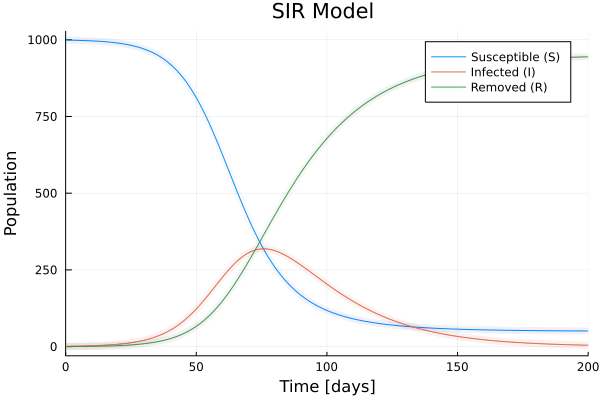

In [108]:
plot(sol, vars=[(0,1), (0,2), (0,3)], title="SIR Model ", 
    xaxis="Time [days]", yaxis="Population", marker=0.005, label=["Susceptible (S)" "Infected (I)" "Removed (R)"])
#animate(sol, lw=3, every=1)